In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
colnames = ["review", "rating", "article"]
df_supp = pd.read_csv('./data/allegro/supplements/data.csv', names=colnames, header=None)
df_rtvagd = pd.read_csv('./data/allegro/rtvagd/data.csv', names=colnames, header=None)

In [64]:
df_rtvagd.head(3)

,review,rating,article
0,"Pralka niestety "" tańczy"" bardziej niż bez pod...",1,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
1,Podkładki nie są całe z gumy. Maja tylko gumow...,3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
2,"Plastikowe, ale pewien efekt antywibracyjny je...",3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm


In [65]:
df_supp.head(3)

,review,rating,article
0,"Trochę za dużo słodzików, mógłby być mniej sło...",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
1,"Żonie nie smakowało, dla mnie OK",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
2,Za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...


In [66]:
# Pominięcie wielkości liter
df_supp['review'] = df_supp['review'].apply(lambda x: x.lower())
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: x.lower())

In [67]:
df_rtvagd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   22077 non-null  object
 1   rating   22077 non-null  int64 
 2   article  22077 non-null  object
dtypes: int64(1), object(2)
memory usage: 517.6+ KB


In [68]:
df_supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14738 entries, 0 to 14737
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   14738 non-null  object
 1   rating   14738 non-null  int64 
 2   article  14738 non-null  object
dtypes: int64(1), object(2)
memory usage: 345.5+ KB


In [69]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla RTVAGD:")
df_rtvagd.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla RTVAGD:


,rating,article
review,,
ok,2339,2339
polecam,1284,1284
super,467,467
wszystko ok,203,203
ok.,168,168
polecam.,111,111
polecam!,77,77
wszystko ok.,63,63
jest ok,54,54


In [70]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla suplementów:")
df_supp.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla suplementów:


,rating,article
review,,
ok,1179,1179
polecam,647,647
super,195,195
wszystko ok,110,110
ok.,98,98
polecam!,68,68
polecam.,54,54
działa,41,41
jest ok,41,41


In [71]:
# Usunięcie duplikatów
df_supp = df_supp.drop_duplicates(subset=['review'])
df_rtvagd = df_rtvagd.drop_duplicates(subset=['review'])

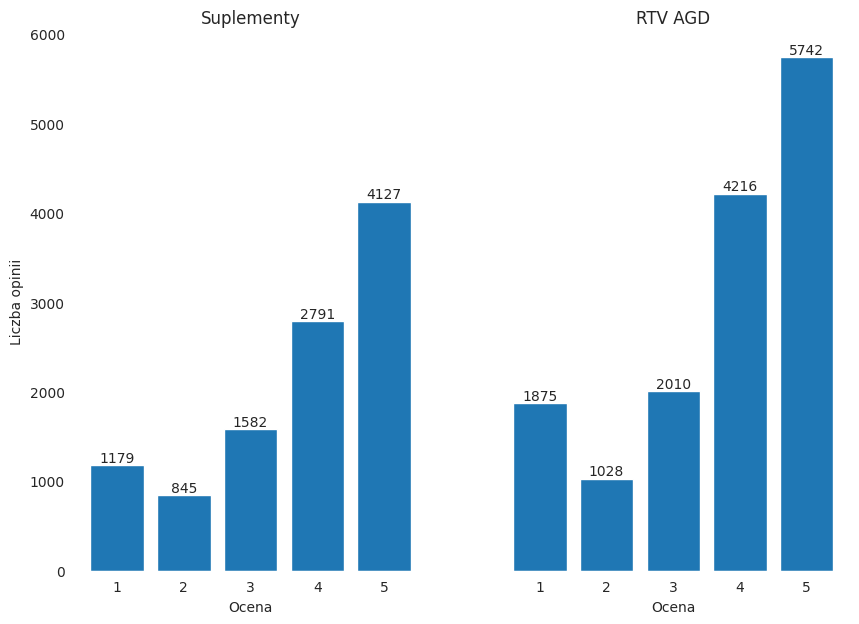

In [72]:
# Wykresy przedstawiające rozłożenie danych w zbiorze
grouped_supp = df_supp.groupby('rating').count()
grouped_rtvagd = df_rtvagd.groupby('rating').count()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
#fig.suptitle("Proporcja opinii dla poszczególnych ocen")
plt.grid(False)
bars1 = ax1.bar(grouped_supp.index, grouped_supp['review'])
bars2 = ax2.bar(grouped_rtvagd.index, grouped_rtvagd['review'])

ax1.set_xticks(grouped_supp.index)
ax1.set_xticklabels(grouped_supp.index)
ax1.set_title("Suplementy")
ax1.set_xlabel("Ocena")
ax1.set_ylabel("Liczba opinii")
ax1.grid(False)
ax1.set_facecolor('none')
ax2.set_xticks(grouped_rtvagd.index)
ax2.set_xticklabels(grouped_rtvagd.index)
ax2.set_title("RTV AGD")
ax2.set_xlabel("Ocena")
ax2.grid(False)
ax2.set_facecolor('none')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')



Podczas pobierania opinii w pewnym momencie zostało zastosowane filitrowanie opinii w celu pomijania tych z oceną '5'.
Oceny te stanowią lwią część wszystkich opinii praktycznie dla każdego dostępnego produktu. Stąd w celu uniknięcia
silnego niezbalansowania danych w pewnym momencie, zostały pobierane tylko opinie z ocenami 1-4.

In [73]:
# Długości poszczególnych opinii
df_supp['review_length'] = df_supp.apply(lambda x: len(x['review'].split(" ")), axis=1)
df_rtvagd['review_length'] = df_rtvagd.apply(lambda x: len(x['review'].split(" ")), axis=1)

In [74]:
print(f"Najkrótsza opinia w kategorii RTVAGD: {df_rtvagd['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii RTVAGD: {df_rtvagd['review_length'].max()}")
print(f"Średnia długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].median()}")
print(f"Ochylenie standardowe długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].std()}")

Najkrótsza opinia w kategorii RTVAGD: 1
Najdłuższa opinia w kategorii RTVAGD: 555
Średnia długość opinii w kategorii RTVAGD: 12.541994485912179
Mediana długość opinii w kategorii RTVAGD: 8.0
Ochylenie standardowe długość opinii w kategorii RTVAGD: 16.19065860266758


In [75]:
print(f"Najkrótsza opinia w kategorii suplementy: {df_supp['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii suplementy: {df_supp['review_length'].max()}")
print(f"Średnia długość opinii w kategorii suplementy: {df_supp['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii suplementy: {df_supp['review_length'].median()}")
print(f"Ochylenie standardowe długość opinii w kategorii suplementy: {df_supp['review_length'].std()}")

Najkrótsza opinia w kategorii suplementy: 1
Najdłuższa opinia w kategorii suplementy: 283
Średnia długość opinii w kategorii suplementy: 11.658494868871152
Mediana długość opinii w kategorii suplementy: 7.0
Ochylenie standardowe długość opinii w kategorii suplementy: 13.69610377551028


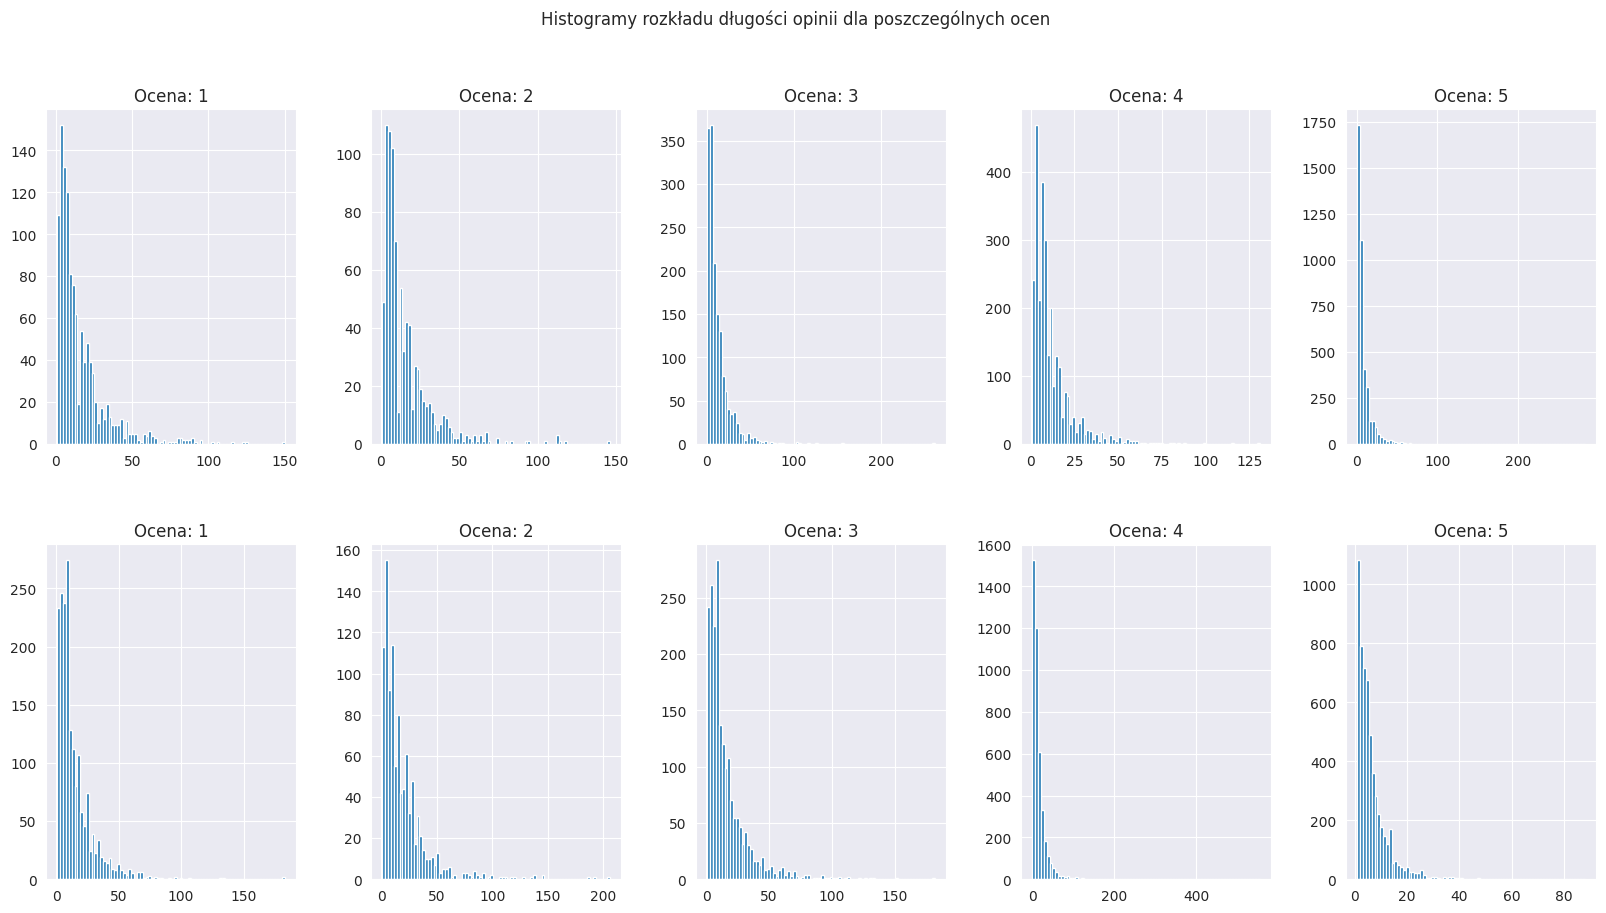

In [76]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Histogramy rozkładu długości opinii dla poszczególnych ocen")

for i in range(5):
    df_supp[df_supp['rating'] == i + 1].hist(column='review_length', bins=80, ax=axes[0, i])
    axes[0, i].set_title(f"Ocena: {i + 1}")

for i in range(5):
    df_rtvagd[df_rtvagd['rating'] == i + 1].hist(column='review_length', bins=80, ax=axes[1, i])
    axes[1, i].set_title(f"Ocena: {i + 1}")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii suplementów')

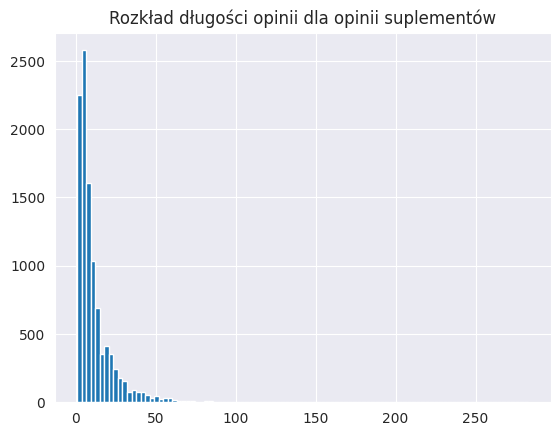

In [77]:
df_supp.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii suplementów")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD')

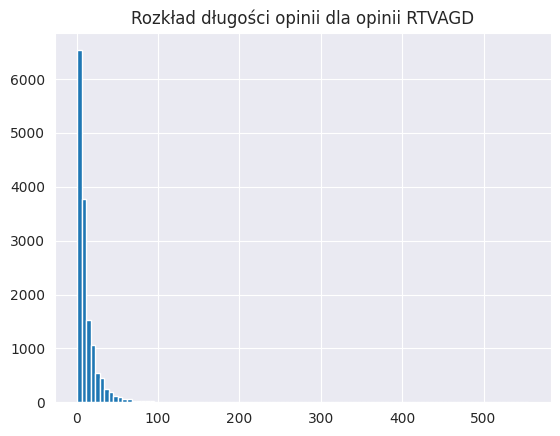

In [78]:

df_rtvagd.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD (0-80)')

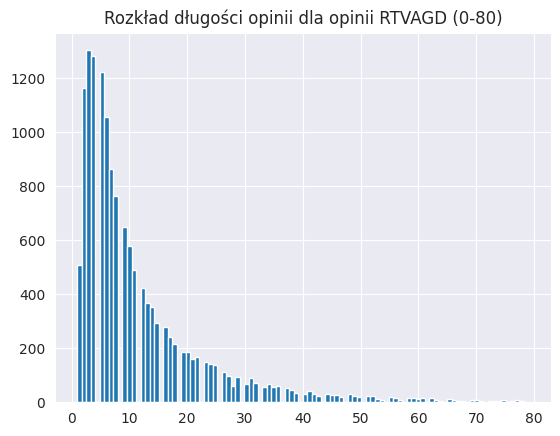

In [79]:
df_rtvagd[(df_rtvagd['review_length'] > 0) & ((df_rtvagd['review_length'] < 80))].hist(
    column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD (0-80)")

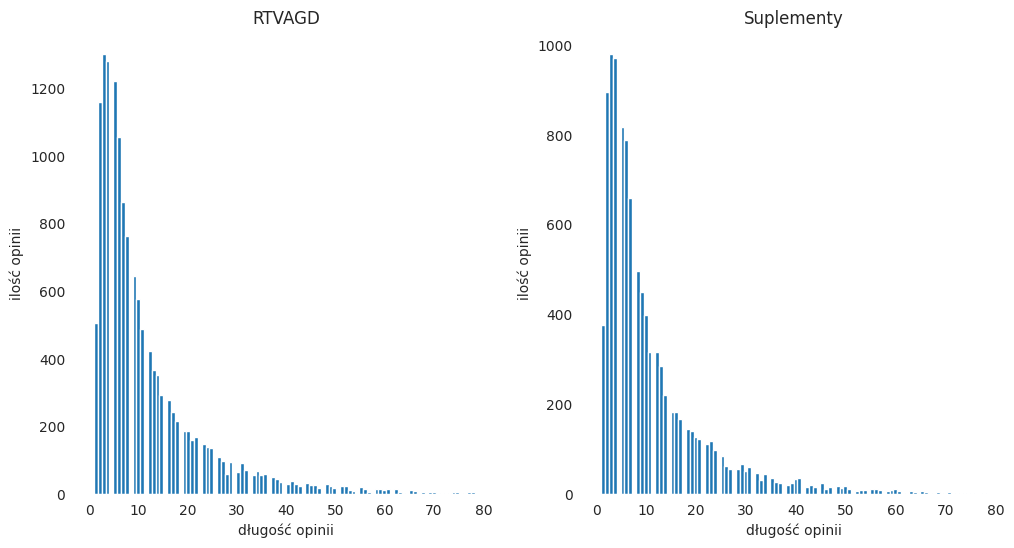

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_supp_slice = df_supp[df_supp['review_length'] < 80]
df_rtvagd_slice = df_rtvagd[df_rtvagd['review_length'] < 80]

ax1.hist(df_rtvagd_slice['review_length'], 100)
ax1.set_title("RTVAGD")
ax1.set_xlabel("długość opinii")
ax1.set_ylabel("ilość opinii")
ax1.grid(False)
ax1.set_facecolor('none')


ax2.hist(df_supp_slice['review_length'], 100)
ax2.set_title("Suplementy")
ax2.set_xlabel("długość opinii")
ax2.set_ylabel("ilość opinii")
ax2.grid(False)
ax2.set_facecolor('none')

## Tokenizacja tekstu

In [81]:
# Usuwanie znaków interpunkcyjnych
import string

df_supp['review'] = df_supp['review'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
df_supp.head(5)

,review,rating,article,review_length
0,trochę za dużo słodzików mógłby być mniej słod...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żonie nie smakowało dla mnie ok,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14
3,średni w smaku zjadliwe ale więcej nie kupię,3,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,8
4,zepsute,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,1


In [82]:
# Usuwanie znaków które nie są literami np. emotikony
import re

df_supp['review'] = df_supp['review'].apply(lambda x: re.sub('[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ ]', '', x))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: re.sub('[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ ]', '', x))
df_supp.head(5)

,review,rating,article,review_length
0,trochę za dużo słodzików mógłby być mniej słod...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żonie nie smakowało dla mnie ok,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14
3,średni w smaku zjadliwe ale więcej nie kupię,3,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,8
4,zepsute,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,1


In [83]:
# Usuwanie słów które mogą pojawiać się w każdym typie opini - stopwords
"""
Polskie stopwords zaczerpnięte z gotowego źródła na Githubie - https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt
Na chwile obecną - wykomentowane, ponieważ klasyfikator daje gorsze wyniki po usunięciu stopwords. Może być to spowodowane złym
dopasowaniem słów do problemu. Można spróbować też utworzyć nową liste (zmodyfikować obecną) stopwords.
"""


# stop_words = []
#
# with open('data/polish.stopwords.txt', 'r') as file:
#     for line in file:
#         stop_words.append(line.strip())
#
# df_supp['review'] = df_supp['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

'\nPolskie stopwords zaczerpnięte z gotowego źródła na Githubie - https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt\nNa chwile obecną - wykomentowane, ponieważ klasyfikator daje gorsze wyniki po usunięciu stopwords. Może być to spowodowane złym\ndopasowaniem słów do problemu. Można spróbować też utworzyć nową liste (zmodyfikować obecną) stopwords.\n'

In [84]:
# lematyzacja za pomocą morfeusz2
"""
Link do narzędzia: http://morfeusz.sgjp.pl/
Jest to narzędzie które pozwala na przeprowadzenie Lemmatyzacji polskich tekstów.
"""
from nltk.tokenize import word_tokenize
from morfeusz2 import Morfeusz

# Inicjalizacja Morfeusza
morfeusz = Morfeusz()


def morfeusz2_lemmatization(phrase, morfeusz):
    stemmed_phrase = []
    tokens = word_tokenize(phrase) # tokenizacja opinii
    for token in tokens: # każdy token jest lematyzowany
        analysis = morfeusz.analyse(token)
        # wybieranie bezokoliczników
        stemmed_phrase.append(analysis[0][2][1].split(':')[0])
    return " ".join(stemmed_phrase)

df_supp['review'] = df_supp['review'].apply(lambda x: morfeusz2_lemmatization(x, morfeusz))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: morfeusz2_lemmatization(x, morfeusz))
df_supp.head(3)

,review,rating,article,review_length
0,trocha za dużo słodzik móc być mniej słodki a ...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żona nie smakować dla miąć oko,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodki i bardzo bardzo czuć że sztuczny nie...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14


In [85]:
# Połączona ramka danych, która zawiera zarówno opinie o suplementach jak i opinie o sprzęcie rtvagd
df_merged = pd.concat([df_supp, df_rtvagd])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25395 entries, 0 to 22076
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         25395 non-null  object
 1   rating         25395 non-null  int64 
 2   article        25395 non-null  object
 3   review_length  25395 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 992.0+ KB


## Wektoryzacja tekstu

In [86]:
# Zamiana tekstu na wektory - wykorzystując podejście bag-of-words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)

X_supp = tfidf_vect.fit_transform(df_supp['review'])
X_rtvagd = tfidf_vect.fit_transform(df_rtvagd['review'])
X_merged = tfidf_vect.fit_transform(df_merged['review'])

# słownik mapujący słowo na jego numer
# tfidf_vect.vocabulary_

In [87]:
X_supp

<10524x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 85762 stored elements in Compressed Sparse Row format>

In [88]:
# Etykiety dla opinii
y_supp = df_supp['rating']
y_rtvagd = df_rtvagd['rating']
y_merged = df_merged['rating']

y_supp

0        4
1        4
2        1
3        3
4        1
        ..
14733    1
14734    3
14735    1
14736    1
14737    4
Name: rating, Length: 10524, dtype: int64

# Budowanie modeli
## 1. SVM Klasyfikator

In [89]:
"""
W celu dobrania odpowiednich parametrów dla klasyfikatora SVC została wykorzystana technika GridSearch.
Poniższe modele zostały zbudowane własnie z tymi parametrami. W celu przeprowadzenia operacji GridSearch
zastosowano jedynie 30% zbioru suplementów, aby uniknąć długiego czasu wykonywania. Wyniki nie dają znacznej
poprawy wydajności klasyfikatora a jedynie minimalną różnicę. Może to być spowodowane małą ilością danych
zastosowanych w operacji (wspomniane 30%).
Parametry jakie udało się uzyskać:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Poniższy kod wykomentowany, z powodów długiego czasu wykonywania.
W przyszłości można roważyć wykonanie tej operacji z większa ilością danych i ewentualne skorygowanie parametrów.
 """

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
#
#
# X_train, _, y_train, _ = train_test_split(
#     X_supp, y_supp, test_size=0.7, random_state=42)
#
#
# param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
# grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
# grid.fit(X_train,y_train)

# grid.best_params_
# {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

"\nW celu dobrania odpowiednich parametrów dla klasyfikatora SVC została wykorzystana technika GridSearch.\nPoniższe modele zostały zbudowane własnie z tymi parametrami. W celu przeprowadzenia operacji GridSearch\nzastosowano jedynie 30% zbioru suplementów, aby uniknąć długiego czasu wykonywania. Wyniki nie dają znacznej\npoprawy wydajności klasyfikatora a jedynie minimalną różnicę. Może to być spowodowane małą ilością danych\nzastosowanych w operacji (wspomniane 30%).\nParametry jakie udało się uzyskać:\n{'C': 1, 'gamma': 1, 'kernel': 'rbf'}\n\nPoniższy kod wykomentowany, z powodów długiego czasu wykonywania.\nW przyszłości można roważyć wykonanie tej operacji z większa ilością danych i ewentualne skorygowanie parametrów.\n "

### 1.1. SVM - opinie o suplementach

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_supp_train, X_supp_test, y_supp_train, y_supp_test = train_test_split(
    X_supp, y_supp, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_supp_train, y_supp_train)

y_supp_pred = svc.predict(X_supp_test)

### 1.2 SVM - opinie o rtvagd

In [91]:
X_rtvagd_train, X_rtvagd_test, y_rtvagd_train, y_rtvagd_test = train_test_split(
    X_rtvagd, y_rtvagd, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_rtvagd_train, y_rtvagd_train)

y_rtvagd_pred = svc.predict(X_rtvagd_test)

### 1.3 SVM - opinie o rtvagd i suplementach

In [92]:
X_merged_train, X_merged_test, y_merged_train, y_merged_test = train_test_split(
    X_merged, y_merged, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_merged_train, y_merged_train)

y_merged_pred = svc.predict(X_merged_test)

### Oceny modeli

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix


def display_confusion_matrix(y_true, y_pred, title):
    """Funkcja wyświetla macierz pomyłek dla klasyfikatorów"""
    # Obliczanie macierzy pomyłek
    cm = confusion_matrix(y_true, y_pred)

    # Definicja listy kolorów
    colors = ['1', '2', '3', '4', '5']

    # Tworzenie wykresu macierzy pomyłek
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Dodawanie tekstu w komórkach macierzy
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    # Zmiana kolorów komórek macierzy
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.5)
    ax.set_xticks(np.arange(len(colors)))
    ax.set_yticks(np.arange(len(colors)))
    ax.set_xticklabels(colors)
    ax.set_yticklabels(colors)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.grid(False)
    # Dodawanie skali kolorów
    cbar = ax.figure.colorbar(im, ax=ax)

    ax.set_title(title)
    # Wyświetlanie wykresu
    plt.show()

### 1.1 SVM - F1 i dokładność

In [94]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix

In [95]:
# F1
f1_supp = f1_score(y_supp_test, y_supp_pred, average='weighted')
f1_rtvagd = f1_score(y_rtvagd_test, y_rtvagd_pred, average='weighted')
f1_merged = f1_score(y_merged_test, y_merged_pred, average='weighted')

In [96]:
# Dokładność
acc_supp = accuracy_score(y_supp_test, y_supp_pred)
acc_rtvagd = accuracy_score(y_rtvagd_test, y_rtvagd_pred)
acc_merged = accuracy_score(y_merged_test, y_merged_pred)

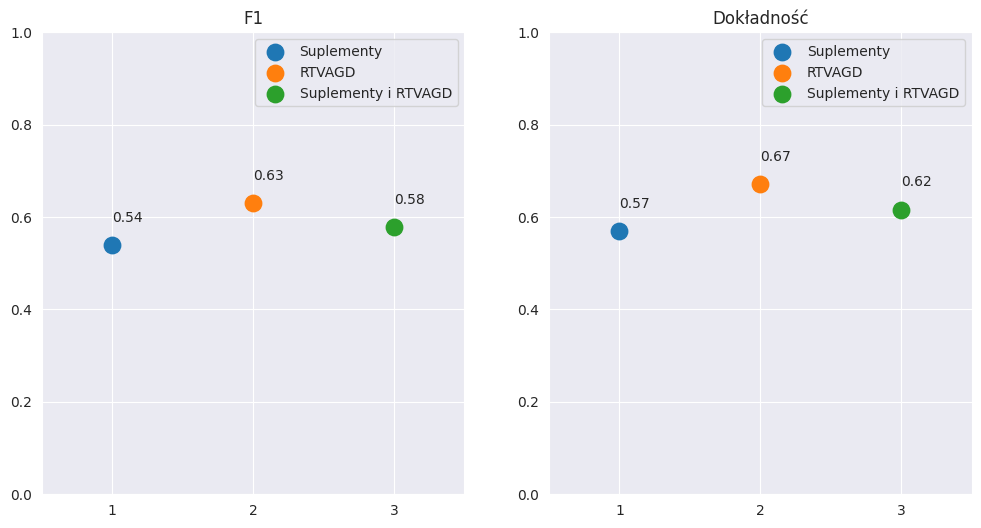

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(1, f1_supp, s=140,  label="Suplementy")
ax1.scatter(2, f1_rtvagd,s=140, label="RTVAGD")
ax1.scatter(3, f1_merged, s=140,label="Suplementy i RTVAGD")
ax1.set_title("F1")
ax1.annotate(round(f1_supp, 2), (1, f1_supp + 0.05))
ax1.annotate(round(f1_rtvagd, 2), (2, f1_rtvagd + 0.05))
ax1.annotate(round(f1_merged, 2), (3, f1_merged + 0.05))
ax1.set_xlim([0.5, 3.5])

ax2.scatter(1, acc_supp,s=140, label="Suplementy")
ax2.scatter(2, acc_rtvagd,s=140, label="RTVAGD")
ax2.scatter(3, acc_merged, s=140,label="Suplementy i RTVAGD")
ax2.set_title("Dokładność")
ax2.annotate(round(acc_supp, 2), (1, acc_supp + 0.05))
ax2.annotate(round(acc_rtvagd, 2), (2, acc_rtvagd + 0.05))
ax2.annotate(round(acc_merged, 2), (3, acc_merged + 0.05))
ax2.set_xlim([0.5, 3.5])
for ax in (ax1, ax2):
    ax.set_ylim([0, 1])
    ax.set_xticks([1,2,3])
    ax.legend()

### 1.2 SVM - Macierze pomyłek

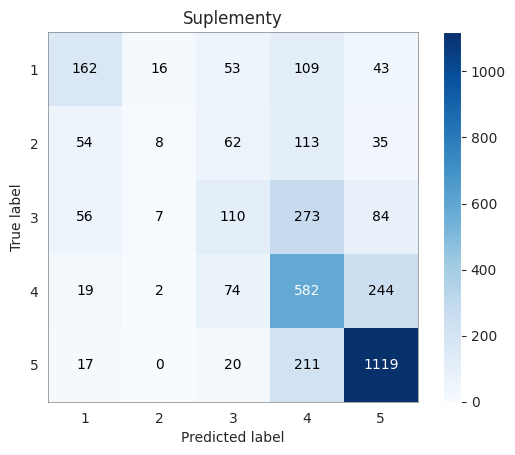

In [98]:
display_confusion_matrix(y_supp_test, y_supp_pred, "Suplementy")

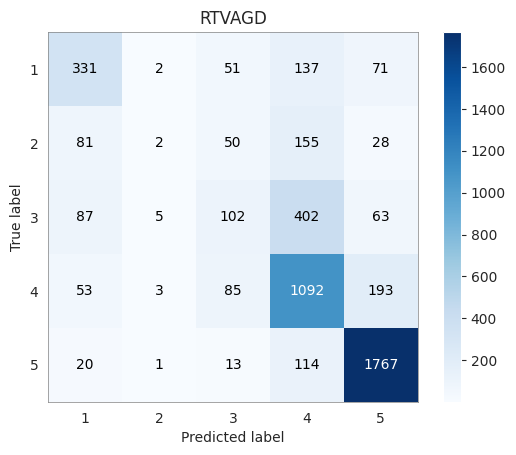

In [99]:
display_confusion_matrix(y_rtvagd_test, y_rtvagd_pred, "RTVAGD")

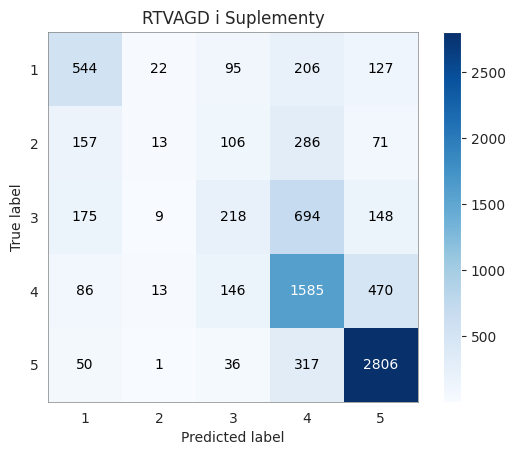

In [100]:
display_confusion_matrix(y_merged_test, y_merged_pred, "RTVAGD i Suplementy")

## 2. Random Forest

In [101]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# 
# param_grid = { 
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy', 'log_loss'],
#     'n_estimators':[10,100,200],
#     'max_features':[1,3,5,7],
#     'min_samples_leaf':[1,2,3],
#     'min_samples_split':[2,2,3]
# }
# grid = GridSearchCV(RandomForestClassifier(),param_grid,refit = True, verbose=2)
# grid.fit(X_merged_train,y_merged_train)
# grid.best_params_
# 
# 
# {'criterion': 'entropy',
#  'max_depth': 8,
#  'max_features': 7,
#  'min_samples_leaf': 1,
#  'min_samples_split': 3,
#  'n_estimators': 10}

 ## 2.1. Random Forest - opinie o suplementach

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10)
rf.fit(X_supp_train, y_supp_train)

y_supp_pred = rf.predict(X_supp_test)

## 2.2. Random Forest - opinie o rtvagd

In [103]:
rf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10)
rf.fit(X_rtvagd_train, y_rtvagd_train)

y_rtvagd_pred = rf.predict(X_rtvagd_test)

## 2.3. Random Forest - opinie o rtvagd i suplementach

In [104]:
rf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10)
rf.fit(X_merged_train, y_merged_train)

y_merged_pred = rf.predict(X_merged_test)

## 2.4 Random Forest - F1 i dokładność

In [105]:
# F1
f1_supp = f1_score(y_supp_test, y_supp_pred, average='weighted')
f1_rtvagd = f1_score(y_rtvagd_test, y_rtvagd_pred, average='weighted')
f1_merged = f1_score(y_merged_test, y_merged_pred, average='weighted')

In [106]:
# Dokładność
acc_supp = accuracy_score(y_supp_test, y_supp_pred)
acc_rtvagd = accuracy_score(y_rtvagd_test, y_rtvagd_pred)
acc_merged = accuracy_score(y_merged_test, y_merged_pred)

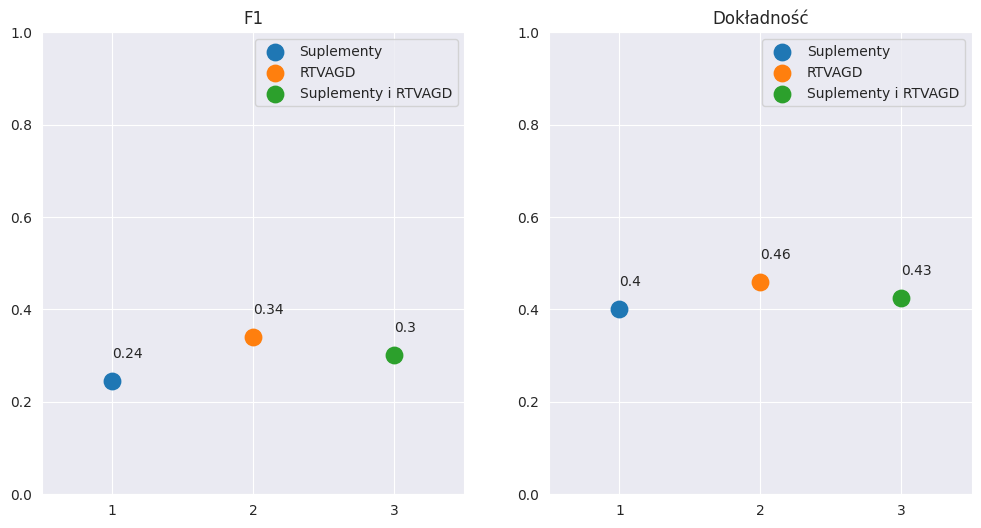

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(1, f1_supp, s=140,  label="Suplementy")
ax1.scatter(2, f1_rtvagd,s=140, label="RTVAGD")
ax1.scatter(3, f1_merged, s=140,label="Suplementy i RTVAGD")
ax1.set_title("F1")
ax1.annotate(round(f1_supp, 2), (1, f1_supp + 0.05))
ax1.annotate(round(f1_rtvagd, 2), (2, f1_rtvagd + 0.05))
ax1.annotate(round(f1_merged, 2), (3, f1_merged + 0.05))
ax1.set_xlim([0.5, 3.5])
ax2.scatter(1, acc_supp,s=140, label="Suplementy")
ax2.scatter(2, acc_rtvagd,s=140, label="RTVAGD")
ax2.scatter(3, acc_merged, s=140,label="Suplementy i RTVAGD")
ax2.set_title("Dokładność")
ax2.annotate(round(acc_supp, 2), (1, acc_supp + 0.05))
ax2.annotate(round(acc_rtvagd, 2), (2, acc_rtvagd + 0.05))
ax2.annotate(round(acc_merged, 2), (3, acc_merged + 0.05))
ax2.set_xlim([0.5, 3.5])
for ax in (ax1, ax2):
    ax.set_ylim([0, 1])
    ax.set_xticks([1,2,3])
    ax.legend()

## 2.5 Random Forest - Macierze pomyłek

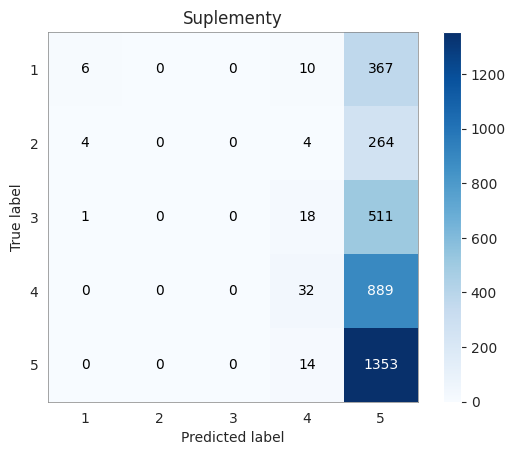

In [108]:
display_confusion_matrix(y_supp_test, y_supp_pred, "Suplementy")

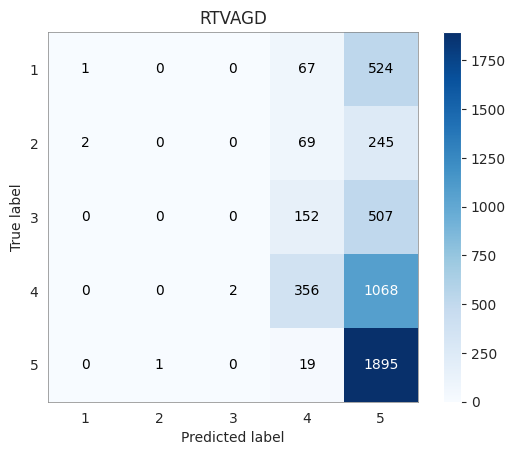

In [109]:
display_confusion_matrix(y_rtvagd_test, y_rtvagd_pred, "RTVAGD")

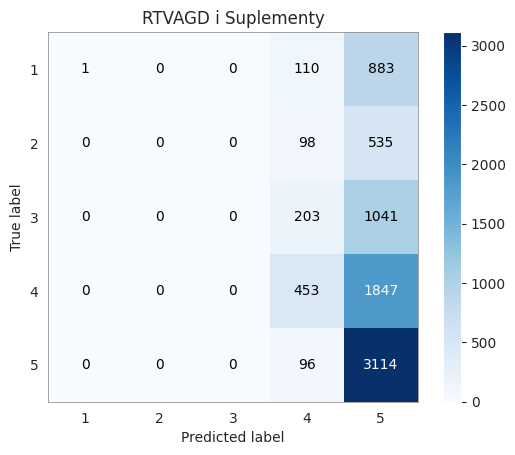

In [110]:
display_confusion_matrix(y_merged_test, y_merged_pred, "RTVAGD i Suplementy")

## 3. Naive Bayes Classifier

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## 3.1 Naive Bayes Classifier - opinie o suplementach

In [112]:
bayes = GaussianNB()
bayes.fit(X_supp_train.toarray(), y_supp_train)
y_supp_pred = bayes.predict(X_supp_test.toarray())

## 3.2 Naive Bayes Classifier - opinie o rtvagd

In [113]:
bayes = GaussianNB()
bayes.fit(X_rtvagd_train.toarray(), y_rtvagd_train)
y_rtvagd_pred = bayes.predict(X_rtvagd_test.toarray())

## 3.3 Naive Bayes Classifier - opinie o rtvagd i suplementach

In [114]:
bayes = GaussianNB()
bayes.fit(X_merged_train.toarray(), y_merged_train)
y_merged_pred = bayes.predict(X_merged_test.toarray())

## 3.4 Naive Bayes Classifier - F1 i dokładność

In [115]:
# F1
f1_supp = f1_score(y_supp_test, y_supp_pred, average='weighted')
f1_rtvagd = f1_score(y_rtvagd_test, y_rtvagd_pred, average='weighted')
f1_merged = f1_score(y_merged_test, y_merged_pred, average='weighted')

In [116]:
# Dokładność
acc_supp = accuracy_score(y_supp_test, y_supp_pred)
acc_rtvagd = accuracy_score(y_rtvagd_test, y_rtvagd_pred)
acc_merged = accuracy_score(y_merged_test, y_merged_pred)

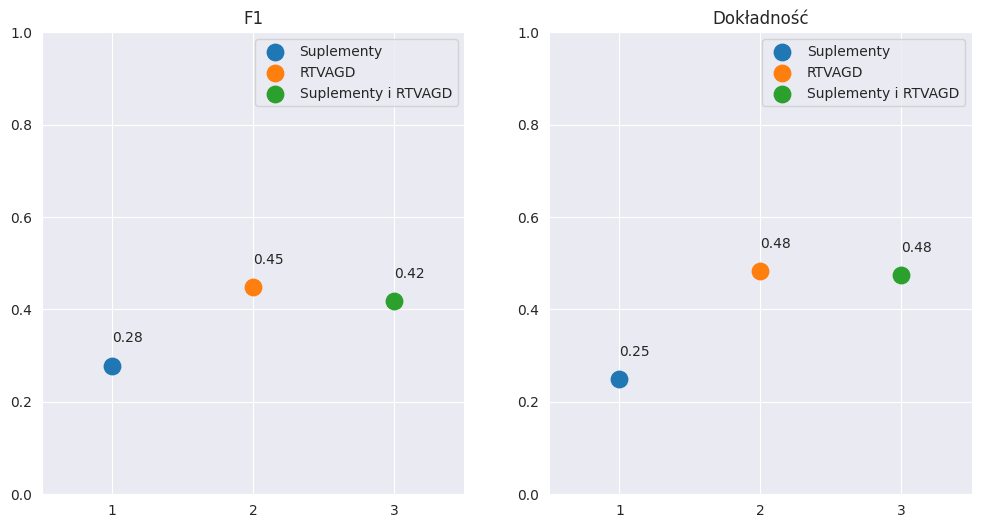

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(1, f1_supp, s=140,  label="Suplementy")
ax1.scatter(2, f1_rtvagd,s=140, label="RTVAGD")
ax1.scatter(3, f1_merged, s=140,label="Suplementy i RTVAGD")
ax1.set_title("F1")
ax1.annotate(round(f1_supp, 2), (1, f1_supp + 0.05))
ax1.annotate(round(f1_rtvagd, 2), (2, f1_rtvagd + 0.05))
ax1.annotate(round(f1_merged, 2), (3, f1_merged + 0.05))
ax1.set_xlim([0.5, 3.5])
ax2.scatter(1, acc_supp,s=140, label="Suplementy")
ax2.scatter(2, acc_rtvagd,s=140, label="RTVAGD")
ax2.scatter(3, acc_merged, s=140,label="Suplementy i RTVAGD")
ax2.set_title("Dokładność")
ax2.annotate(round(acc_supp, 2), (1, acc_supp + 0.05))
ax2.annotate(round(acc_rtvagd, 2), (2, acc_rtvagd + 0.05))
ax2.annotate(round(acc_merged, 2), (3, acc_merged + 0.05))
ax2.set_xlim([0.5, 3.5])
for ax in (ax1, ax2):
    ax.set_ylim([0, 1])
    ax.set_xticks([1,2,3])
    ax.legend()

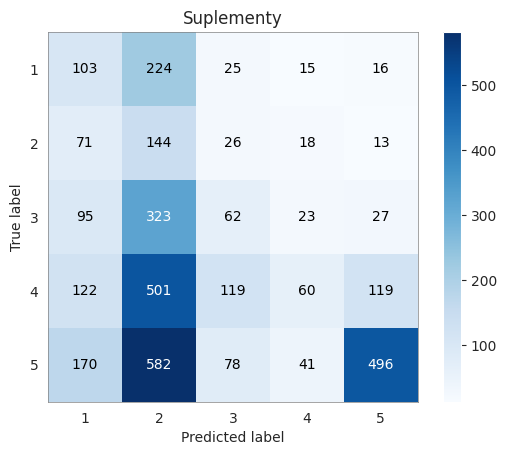

In [118]:
display_confusion_matrix(y_supp_test, y_supp_pred, "Suplementy")

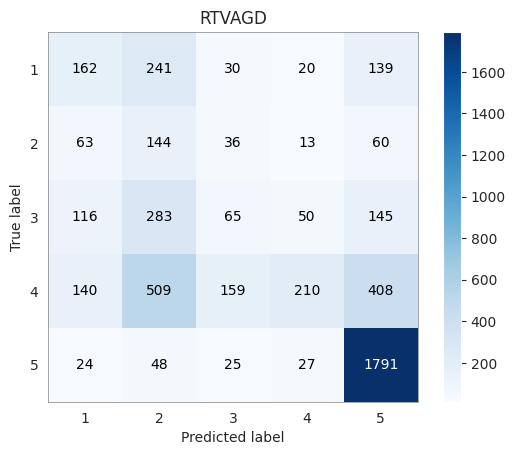

In [119]:
display_confusion_matrix(y_rtvagd_test, y_rtvagd_pred, "RTVAGD")

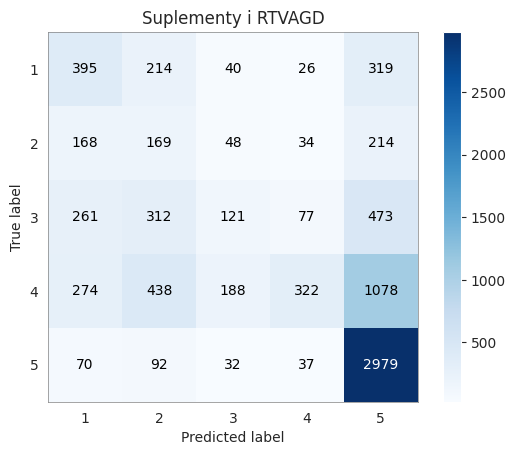

In [120]:
display_confusion_matrix(y_merged_test, y_merged_pred, "Suplementy i RTVAGD")

## 4. AdaBoostClassifier

In [121]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_supp_train, y_supp_train)

y_supp_pred = ada.predict(X_supp_test)

In [122]:
ada = AdaBoostClassifier()
ada.fit(X_rtvagd_train, y_rtvagd_train)

y_rtvagd_pred = ada.predict(X_rtvagd_test)

In [123]:
ada = AdaBoostClassifier()
ada.fit(X_merged_train, y_merged_train)

y_merged_pred = ada.predict(X_merged_test)

In [124]:
# F1
f1_supp = f1_score(y_supp_test, y_supp_pred, average='weighted')
f1_rtvagd = f1_score(y_rtvagd_test, y_rtvagd_pred, average='weighted')
f1_merged = f1_score(y_merged_test, y_merged_pred, average='weighted')
# Dokładność
acc_supp = accuracy_score(y_supp_test, y_supp_pred)
acc_rtvagd = accuracy_score(y_rtvagd_test, y_rtvagd_pred)
acc_merged = accuracy_score(y_merged_test, y_merged_pred)

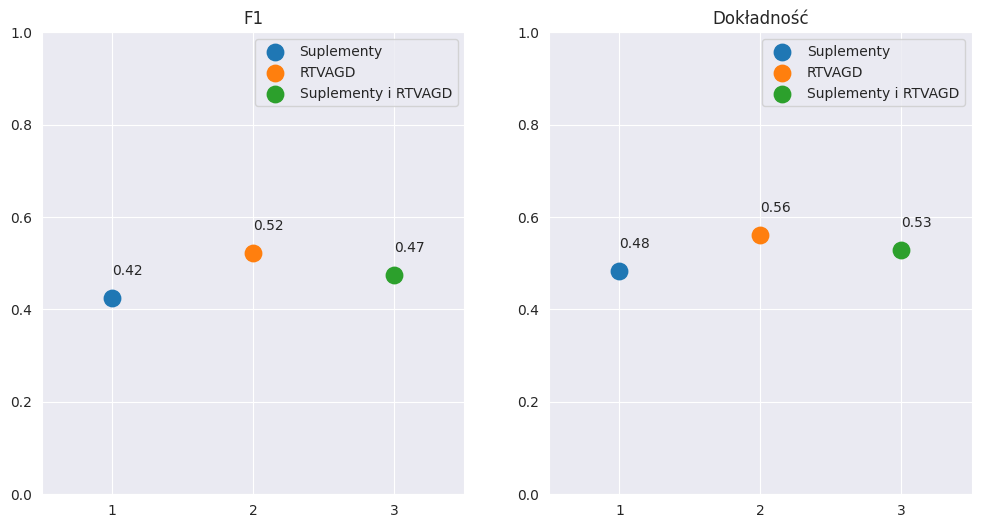

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(1, f1_supp, s=140,  label="Suplementy")
ax1.scatter(2, f1_rtvagd,s=140, label="RTVAGD")
ax1.scatter(3, f1_merged, s=140,label="Suplementy i RTVAGD")
ax1.set_title("F1")
ax1.annotate(round(f1_supp, 2), (1, f1_supp + 0.05))
ax1.annotate(round(f1_rtvagd, 2), (2, f1_rtvagd + 0.05))
ax1.annotate(round(f1_merged, 2), (3, f1_merged + 0.05))
ax1.set_xlim([0.5, 3.5])
ax2.scatter(1, acc_supp,s=140, label="Suplementy")
ax2.scatter(2, acc_rtvagd,s=140, label="RTVAGD")
ax2.scatter(3, acc_merged, s=140,label="Suplementy i RTVAGD")
ax2.set_title("Dokładność")
ax2.annotate(round(acc_supp, 2), (1, acc_supp + 0.05))
ax2.annotate(round(acc_rtvagd, 2), (2, acc_rtvagd + 0.05))
ax2.annotate(round(acc_merged, 2), (3, acc_merged + 0.05))
ax2.set_xlim([0.5, 3.5])
for ax in (ax1, ax2):
    ax.set_ylim([0, 1])
    ax.set_xticks([1,2,3])
    ax.legend()

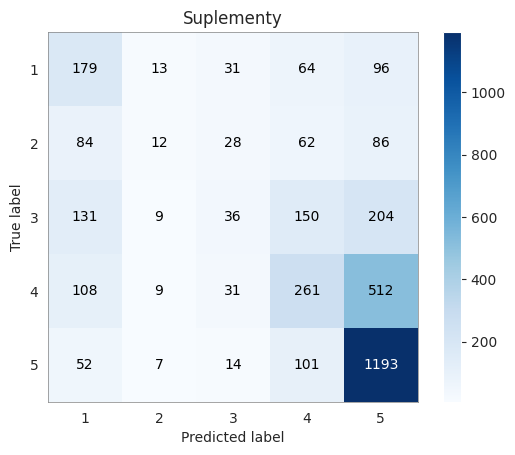

In [126]:
display_confusion_matrix(y_supp_test, y_supp_pred, "Suplementy")

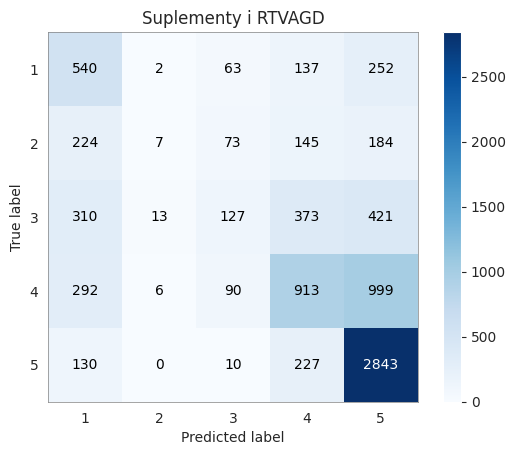

In [127]:
display_confusion_matrix(y_merged_test, y_merged_pred, "Suplementy i RTVAGD")

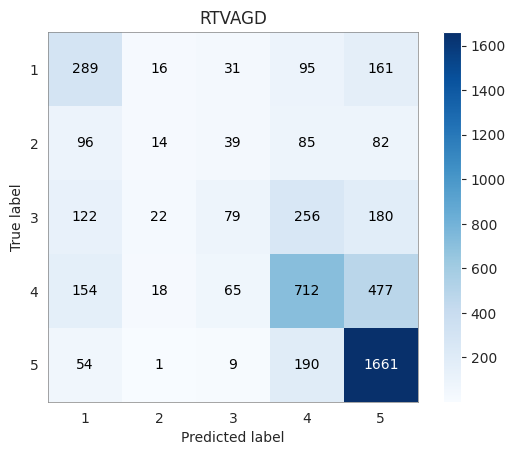

In [128]:
display_confusion_matrix(y_rtvagd_test, y_rtvagd_pred, "RTVAGD")